In [1]:
import numpy as np
import pandas as pd
import os
import librosa, librosa.display
import soundfile as sf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import seaborn as sns
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
from scipy.signal import spectrogram, find_peaks

Details:
- Sample rate: 16000 Hz.
- Data type: 16-bit PCM (int16).
- File size: Each example has a file size of 128 kB (5.53 GB for complete dataset).
- Duration: 4 seconds.
- Sound: Piano (digital).
- Chords were played by a human on a velocity-sensitive piano keyboard.
- 3 seconds pressed, 1 second released.

- 3 octaves (2,3,4).
- 12 base notes per octave: Cn, Df, Dn, Ef, En, Fn, Gf, Gn, Af, An, Bf, Bn. (n is natural, f is flat).
- 4 triad types per note: major (j), minor (n), diminished (d), augmented (a). No inversions.
- 3 volumes per triad: forte (f), metsoforte (m), piano (p).

## Obtain all the chord file names as a list

In [4]:
import os

# folder path
dir_path = r'./audio_augmented_x10'

# list to store files
chord_files = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        chord_files.append(path)
# print(res)

In [5]:
df = pd.DataFrame(columns=['file_name', 'sound', 'octave', 'triad_type', 'volume', 'base_note_name'])

In [6]:
name = 'piano_2_Af_a_f_00.wav'
name_data = name[:-4].split('_')
name_data

['piano', '2', 'Af', 'a', 'f', '00']

In [7]:
file_name = []
sound = []
octave = []
triad_type = []
volume = []
chord_idx = []
base_note_name = []

for file in chord_files:
    name_data = file[:-4].split('_')
    
    file_name.append(file)
    sound.append(name_data[0])
    octave.append(name_data[1])
    triad_type.append(name_data[3])
    volume.append(name_data[4])
    chord_idx.append(name_data[5])
    base_note_name.append(name_data[2])

In [8]:
df = pd.DataFrame(list(zip(file_name, 
                      sound,
                      octave,
                      triad_type,
                      volume,
                      chord_idx,
                      base_note_name)),
               columns=['file_name', 'sound', 'octave', 'triad_type', 'volume', 'chord_idx', 'base_note_name'])

In [9]:
df.head()

,file_name,sound,octave,triad_type,volume,chord_idx,base_note_name
0,piano_3_Af_a_m_45.wav,piano,3,a,m,45,Af
1,piano_4_Gn_j_f_13.wav,piano,4,j,f,13,Gn
2,piano_2_Fn_d_m_63.wav,piano,2,d,m,63,Fn
3,piano_2_Df_a_f_47.wav,piano,2,a,f,47,Df
4,piano_4_Fn_a_p_91.wav,piano,4,a,p,91,Fn


In [10]:
# Applying the condition
df['triad_type'].mask(df['triad_type'] == 'j', 'major', inplace=True)
df['triad_type'].mask(df['triad_type'] == 'n', 'minor', inplace=True)
df['triad_type'].mask(df['triad_type'] == 'd', 'dim', inplace=True)
df['triad_type'].mask(df['triad_type'] == 'a', 'aug', inplace=True)

df['volume'].mask(df['volume'] == 'f', 'forte', inplace=True)
df['volume'].mask(df['volume'] == 'm', 'mezzoforte', inplace=True)
df['volume'].mask(df['volume'] == 'p', 'piano', inplace=True)

In [11]:
df.head(20)

,file_name,sound,octave,triad_type,volume,chord_idx,base_note_name
0,piano_3_Af_a_m_45.wav,piano,3,aug,mezzoforte,45,Af
1,piano_4_Gn_j_f_13.wav,piano,4,major,forte,13,Gn
2,piano_2_Fn_d_m_63.wav,piano,2,dim,mezzoforte,63,Fn
3,piano_2_Df_a_f_47.wav,piano,2,aug,forte,47,Df
4,piano_4_Fn_a_p_91.wav,piano,4,aug,piano,91,Fn
5,piano_3_Cn_d_f_61.wav,piano,3,dim,forte,61,Cn
6,piano_4_En_j_m_07.wav,piano,4,major,mezzoforte,07,En
7,piano_2_Dn_d_f_77.wav,piano,2,dim,forte,77,Dn
8,piano_2_An_n_f_59.wav,piano,2,minor,forte,59,An
9,piano_3_An_d_m_75.wav,piano,3,dim,mezzoforte,75,An


In [12]:
df['chord'] = df['base_note_name'] + "_" + df['triad_type']

## Chord Data EDA

Look at the count of each chord within the dataset 

<AxesSubplot: xlabel='base_note_name', ylabel='count'>

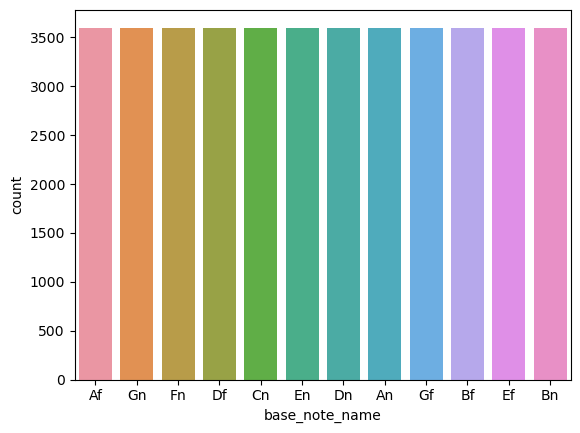

In [13]:
sns.countplot(x=df['base_note_name'])

The datasets between the each base notes is very evenly distributed. This is because the dataset was generated with evenness in mind.

In [14]:
chord_file = dir_path + "/" + df['file_name'][16]

In [15]:
# load the audio file and show raw data and sample rate
signal, fs = librosa.load(chord_file, sr=None)
print("Y is a numpy array:", signal)
print("Shape of Y:", signal.shape)
print("Sample Rate:", fs)

Y is a numpy array: [0. 0. 0. ... 0. 0. 0.]
Shape of Y: (64000,)
Sample Rate: 16000


In [16]:
# Play the first Audio file
ipd.Audio(chord_file)

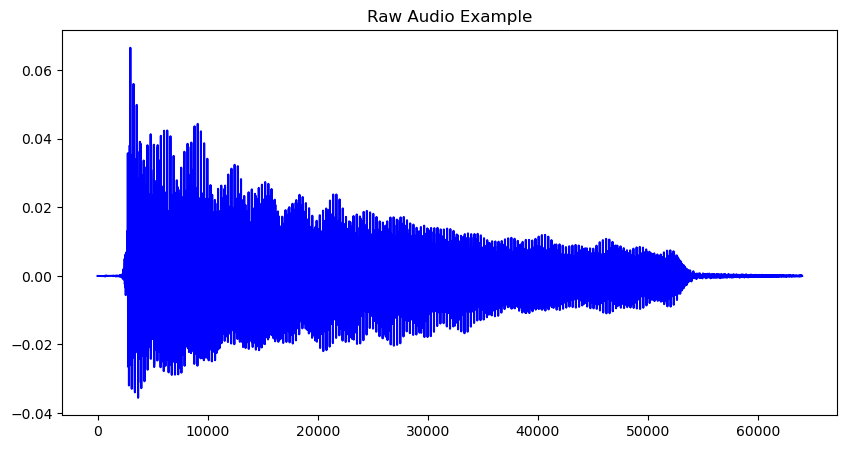

In [17]:
# turn raw data array to pd series and plot the audio example
pd.Series(signal).plot(figsize=(10,5), title="Raw Audio Example", color='blue');

In [18]:
len(signal)

64000

In [19]:
fs

16000

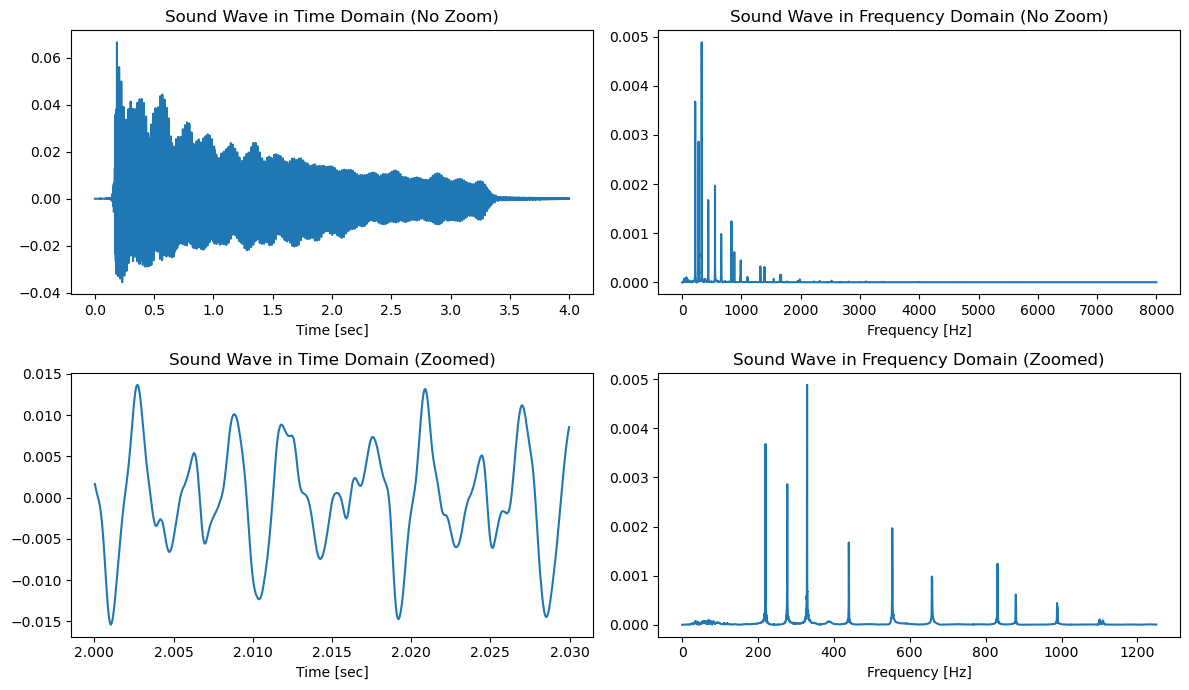

In [20]:
# fs, signal = wavfile.read(dir_path + "/" + df['file_name'][0])
signal, fs = librosa.load(chord_file, sr=None)
N = len(signal)
time = np.linspace(0., N/fs, N)

# Fourier Transform
y_freq = fftfreq(N, 1/fs)[:N//2]  # array for frequency stamps
signal_f = fft(signal) # Signal in frequency domain
signal_f_onesided = 2.0/N * np.abs(signal_f[0:N//2]) # taking positive terms

# Plotting signal in time and frequency domains
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
axes[0,0].plot(time, signal)
axes[0,0].set_title("Sound Wave in Time Domain (No Zoom)")
axes[0,0].set(xlabel='Time [sec]')
axes[0,1].plot(y_freq, signal_f_onesided)
axes[0,1].set_title("Sound Wave in Frequency Domain (No Zoom)")
axes[0,1].set(xlabel='Frequency [Hz]')
axes[1,0].plot(time[(N//2):(N//2+480)], signal[(N//2):(N//2+480)])
axes[1,0].set_title("Sound Wave in Time Domain (Zoomed)")
axes[1,0].set(xlabel='Time [sec]')
axes[1,1].plot(y_freq[:5000], signal_f_onesided[:5000])
axes[1,1].set_title("Sound Wave in Frequency Domain (Zoomed)")
axes[1,1].set(xlabel='Frequency [Hz]')
fig.tight_layout()
plt.show()

In [21]:
# Use STFT on raw audio data
D = librosa.stft(signal)
# convert from aplitude to decibel values by taking the absolute value of D in reference what the max value would be
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# see the shape of transformed data
print("New shape of transformed data", S_db.shape)

New shape of transformed data (1025, 126)


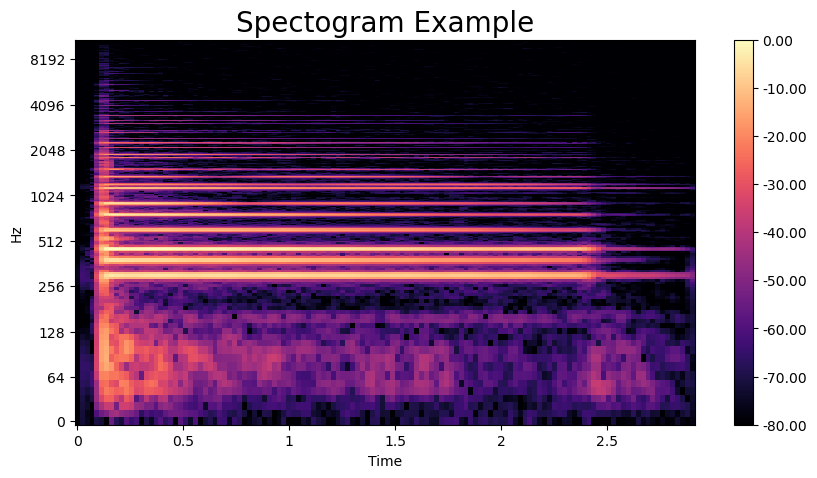

In [22]:
# plot transformed data as spectogram
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f');

In [23]:
# apply mel spectogram without STFT
S = librosa.feature.melspectrogram(signal, sr=fs, n_mels=128*2)
print("Shape of Mel Spectrogram", S.shape)
# use that converting function as above
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

Shape of Mel Spectrogram (256, 126)


/var/folders/7g/kpw1gjw539l9x_wr2fw8njj80000gn/T/ipykernel_94464/318922632.py:2: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(signal, sr=fs, n_mels=128*2)


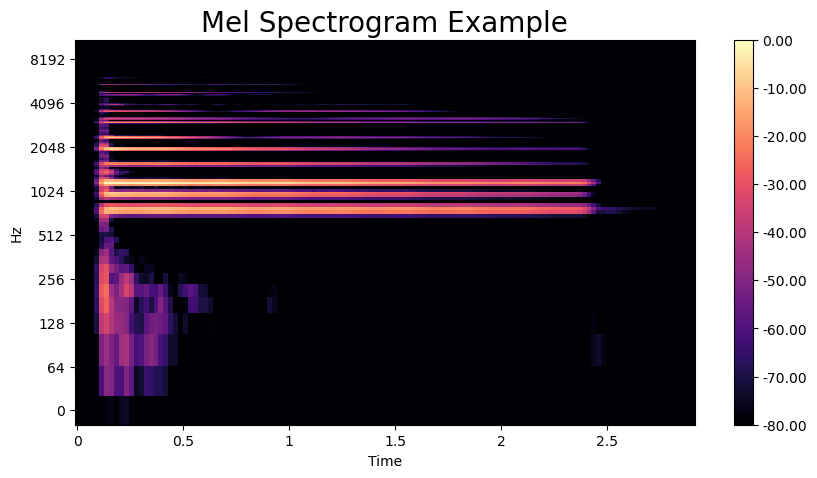

In [24]:
# plot the mel spectrogram
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel Spectrogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f');

## Chromagram

- A chromagram is a type of visual representation of musical data in which the vertical axis represents different musical pitches, and the horizontal axis represents time. 

- Each pitch is represented by a specific color, and the intensity of the color corresponds to the strength or amplitude of that pitch in the music at a given time. 

- Chromagrams can be used to analyze and study the harmonic structure of a piece of music.

- Assuming the equal-tempered scale, one considers twelve chroma values represented by the set
{C, C♯, D, D♯, E , F, F♯, G, G♯, A, A♯, B}

- Enumerating the chroma values, one can identify the set of chroma values with the set of integers {1,2,...,12}, where 1 refers to chroma C, 2 to C♯, and so on.

In [25]:
S = np.abs(librosa.stft(signal))
chroma = librosa.feature.chroma_stft(S=S, sr=fs)

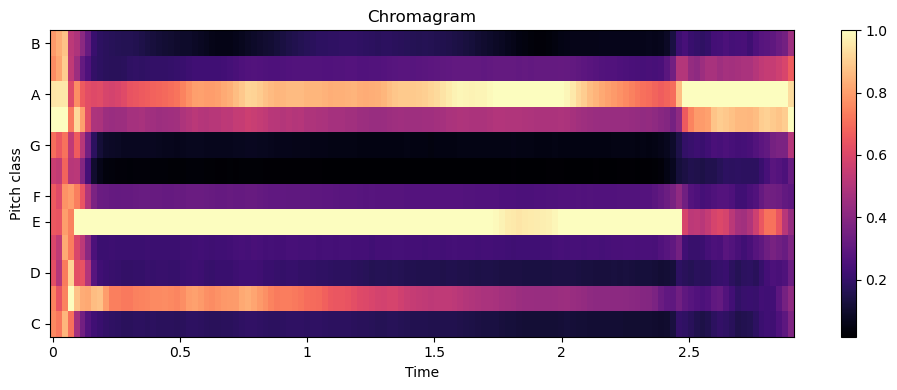

In [26]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

In [ ]:
chroma_avg = np.average(chroma, axis=1)

In [ ]:
chroma_avg

In [ ]:
chroma_cols = ['chroma_C', 
               'chroma_C#', 
               'chroma_D', 
               'chroma_D#', 
               'chroma_E', 
               'chroma_F',
               'chroma_F#',
               'chroma_G',
               'chroma_G#',
               'chroma_A',
               'chroma_A#',
               'chroma_B']

df_chroma = pd.DataFrame([np.average(chroma, axis=1)], columns=chroma_cols)

In [ ]:
df_chroma

In [ ]:
chroma_all =  np.empty(shape=[0, 12])

for index, chord_file in df['file_name'].iteritems():
    file_path = dir_path + "/" + chord_file
    
    signal, fs = librosa.load(file_path)
    
    # generate the chroma
    S = np.abs(librosa.stft(signal))
    chroma = librosa.feature.chroma_stft(S=S, sr=sr)
    
    chroma_avg = np.average(chroma, axis=1)
    chroma_all = np.append(chroma_all, [chroma_avg], axis=0)
    # print(chroma_all)
    
df_chroma = pd.DataFrame(chroma_all, columns=chroma_cols)

In [ ]:
df_chroma.head()

In [ ]:
df_feat = pd.concat(df, df_chroma, axis=1)

In [ ]:
df_feat.head()

## 1D CNN

In [11]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
import tensorflow as tf
from keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.optimizers.legacy import Adam

In [12]:
raw_sig_all = [] 

for index, chord_file in df['file_name'].head(10000).items():
    file_path = dir_path + "/" + chord_file
    
    signal, fs = librosa.load(file_path, sr=None)
    
    raw_sig_all.append(signal)

In [13]:
raw_sig_all = np.array(raw_sig_all)

In [14]:
raw_sig_all = np.vstack(raw_sig_all)

In [15]:
raw_sig_all.shape

(10000, 64000)

In [17]:
raw_sig_test = [] 

for index, chord_file in df['file_name'].iloc[15000:18000].items():
    file_path = dir_path + "/" + chord_file
    
    signal, fs = librosa.load(file_path, sr=None)
    
    raw_sig_test.append(signal)

In [18]:
raw_sig_test = np.array(raw_sig_test)

In [19]:
raw_sig_test = np.vstack(raw_sig_test)

In [20]:
raw_sig_test.shape

(3000, 64000)

In [21]:
train_le = LabelEncoder()
test_le = LabelEncoder()

In [22]:
X_train = raw_sig_all
y_train = train_le.fit_transform(df['chord'].head(10000))

In [23]:
X_test = raw_sig_test
y_test = test_le.fit_transform(df['chord'].iloc[15000:18000])

In [24]:
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [25]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [26]:
X_train.shape

(10000, 64000, 1)

In [27]:
y_train.shape

(10000, 48)

In [28]:
y_test.shape[1]

48

In [30]:
# @tf.function(jit_compile=False)
def network(X_train,y_train,X_test,y_test):
    im_shape=(X_train.shape[1],1)
    inputs_cnn= Input(shape=(im_shape), name='inputs_cnn')
    
    conv1_1=Convolution1D(128, 100, activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    
    conv2_1=Convolution1D(64, 50, activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=25, strides=(2), padding="same")(conv2_1)
    
    conv3_1=Convolution1D(32, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    
    conv4_1=Convolution1D(16, (3), activation='relu', input_shape=im_shape)(pool3)
    conv4_1=BatchNormalization()(conv4_1)
    pool4=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv4_1)
    
    # conv3_1=Convolution1D(16, (3), activation='relu', input_shape=im_shape)(pool2)
    # conv3_1=BatchNormalization()(conv3_1)
    # pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    
    flatten=Flatten()(pool4)
    
    dense_end1 = Dense(100, activation='relu')(flatten)
    dense_end2 = Dense(50, activation='relu')(dense_end1)
    
    main_output = Dense(y_test.shape[1], activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=10,callbacks=callbacks, batch_size=64,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [31]:
def evaluate_model(history, X_test, y_test, model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [ ]:
model, history = network(X_train,y_train,X_test,y_test)

Metal device set to: Apple M1


2023-01-13 19:45:15.650209: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-13 19:45:15.650427: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2023-01-13 19:45:19.506819: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-13 19:45:20.017239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - ETA: 0s - loss: 4.0954 - accuracy: 0.0271 

2023-01-13 20:18:04.272114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 2055s 13s/step - loss: 4.0954 - accuracy: 0.0271 - val_loss: 12.5388 - val_accuracy: 0.0180
Epoch 2/10
157/157 [==============================] - 2067s 13s/step - loss: 3.8681 - accuracy: 0.0234 - val_loss: 5.3199 - val_accuracy: 0.0173
Epoch 3/10
157/157 [==============================] - 1882s 12s/step - loss: 3.8617 - accuracy: 0.0266 - val_loss: 3.9102 - val_accuracy: 0.0157
Epoch 4/10
 33/157 [=====>........................] - ETA: 23:28 - loss: 3.8875 - accuracy: 0.0218

/var/folders/_v/f2pm2d29259fzwzp0lwvjm200000gn/T/ipykernel_45664/3946649356.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.00064237 0.00064182 0.00036566] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(signal, sr=sr)[0]


(173,)


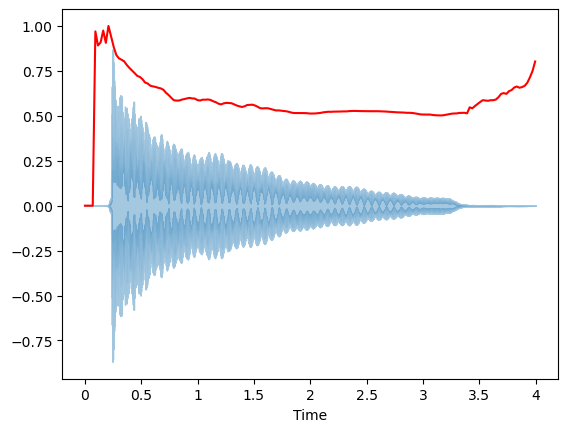

In [109]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(signal, sr=sr)[0]
print(spectral_centroids.shape)

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(signal, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

## Feature Engineering

1. Spectral features: The frequency spectrum of the chord can be analyzed to extract information such as the power in different frequency bands, the harmonic peaks, and the spectral centroid.

2. Timbre features: Timbre is the quality of a sound that allows us to differentiate between different instruments or sounds that have the same pitch and loudness. Features such as MFCCs, Chroma and Tonnetz are commonly used to describe the timbre of the chord.

3. Pitch features: Pitch is the perceived fundamental frequency of a sound. Pitch information such as fundamental frequency, and harmonic peaks can be used to extract the notes that compose the chord.

### Fundamental Frequency and Harmonics 

Harmonics are the overtones of a sound, they are the additional frequencies that are present in a sound along with the fundamental frequency. In the case of a piano chord, harmonics are the additional notes that are present in the chord along with the fundamental notes.

In a piano chord, each note is composed of multiple harmonics, these harmonics are integer multiples of the fundamental frequency. The fundamental frequency is the lowest frequency present in the chord and is often referred to as the first harmonic. The next highest frequency present in the chord is known as the second harmonic and is twice the frequency of the fundamental, and so on.

For example, if the fundamental frequency of a chord is C4 (261.63 Hz), the second harmonic will be at 523.25 Hz (2261.63), the third harmonic will be at 784.88 (3261.63) and so on.

When all the harmonics of the fundamental frequency are present, the sound is perceived as being rich and complex. Each harmonic adds its own unique character to the overall sound of the chord.

It's important to note that each piano key produce a different set of harmonics, so the harmonics of a chord will depend on the notes present in the chord.

Harmonics: [ 415.  523.  656.  659.  831. 1048. 1248. 1321. 1575. 1668. 2091. 2108.]


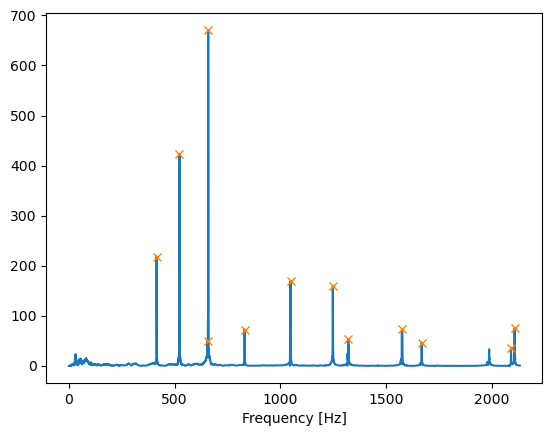

In [49]:
# h: height threshold. I defined as %5 of max value
h = signal_f_onesided.max()*5/100
peaks, _ = find_peaks(signal_f_onesided, distance=10, height = h)

freq_50_index = np.abs(y_freq - 50).argmin() # finding index for 50 Hz
peaks = peaks[peaks>freq_50_index] # filtering out peaks less than 50 Hz
harmonics = y_freq[peaks]
print("Harmonics: {}".format(np.round(harmonics)))

# Plot
i = peaks.max() + 100
plt.plot(y_freq[:i], signal_f_onesided[:i])
plt.plot(y_freq[peaks], signal_f_onesided[peaks], "x")
plt.xlabel('Frequency [Hz]')
plt.show()

In [48]:
# I would like to create a method so that I can use in the next section
# The method will read sound file, apply Fourier, find peak frequencies and return
# Input: path of the sound file
# Output: Frequency peaks
# print_peaks = true to plot peaks

def find_harmonics(path, print_peaks=False):
    fs, X = wavfile.read(path)
    N = len(X)
    X_F = fft(X)
    X_F_onesided = 2.0/N * np.abs(X_F[0:N//2])
    freqs = fftfreq(N, 1/fs)[:N//2]
    freqs_50_index = np.abs(freqs - 50).argmin()
    
    h = X_F_onesided.max()*5/100
    peaks, _ = find_peaks(X_F_onesided, distance=10, height = h)
    peaks = peaks[peaks>freqs_50_index]
    harmonics = np.round(freqs[peaks],2)
    
    if print_peaks:
        i = peaks.max() + 100
        plt.plot(freqs[:i], X_F_onesided[:i])
        plt.plot(freqs[peaks], X_F_onesided[peaks], "x")
        plt.xlabel('Frequency [Hz]')
        plt.show()
    return harmonics